# Bank Customer Churn Prediction using Machine Learning

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate must exceed its churn rate. A high churn rate could adversely affect profits and impede growth. Churn rate is an important factor in the telecommunications industry. In most areas, many of these companies compete, making it easy for people to transfer from one provider to another. The churn rate not only includes when customers switch carriers but also includes when customers terminate service without switching. This measurement is most valuable in subscriber-based businesses in which subscription fees comprise most of the revenues.

![image](Churn.png) 



## Table of Contents

* [1.0 Problem Statement](#ps)
    * [1.1 Project Goal](#pg)
    * [1.2 Data](#dt)
    
<br>

* [2.0 Data Preparation](#dp)  

<br>

* [3.0 Exploratory Data Analysis](#eda)
    - [3.1 Churn count and Percentage](#ccp)
    - [3.2 Mean Age of Churned and Retaining Customers](#ma)
    - [3.3 Mean Balance of Churned and Retaining Customers](#mb)
    - [3.4 Churned counts by gender, credit card, membership](#cc)

<br>

* [4.0 Inferential Statistics](#is)
    - [4.1 Test for difference in mean age](#tdm)
    - [4.2 Test for difference in prportion](#tdp)
    
<br>
    
* [5.0 Feature Engineering](#fg)
    - [5.1 Creation of new features](#cnf)
    
<br>    
    
* [6.0 Modeling](#md)
    - [6.1 OneHot encoding](#ohe)
    - [6.2 Scaling and Transforming data](#st)
    - [6.3 Splitting of dataset](#tts)
    - [6.4 Selected model](#mds)
    - [6.5 Models' evaluation](#mo_ev)
    - [6.6 Feature importance](#var_imp)
    - [6.7 Model tuning](#mod_tune)
    - [6.8 Confusion matrix](#conf_mat)
    - [6.9 ROC curve](#ROC)
    
    
<br>    
    
* [7.0 Conclusion](#cl)

<br>

* [References](#ref)

## 1.0 Problem Statement <a id='ps'></a>

<p style="text-align:justify;">Customer churn or attrition is an important phenomenon in the business which deserves rigorous statistical analysis and prediction to inform decision makers. As the saying goes, "Business is all about the numbers".
Banks, telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one( Reichheld & Sasser 1990)</p>

## 1.1 Project Goal <a id='pg'></a>

<p style="text-align:justify;">The main objective of this project is to develop a predictive model to predict customers that will churn from a bank. The event that defines the customer abandonment is the closing of the customer's bank account. </p>

Other goals include:
* Test whether the difference in the churn proportion fo the following is statistically significant:
    - Male and Female
    - Credit card and non-credit card holders
    - Active members and non-active members
    

## 1.2 Data <a id='dt'><a/>
It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.
    
    
### **Variables:**

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)



In [1]:
# Installation of required libraries


# we will import the libraries we will need for the data preparation step

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import os
import datetime
from statsmodels.stats.proportion import proportions_ztest

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


In [2]:
# Reading the dataset
data = pd.read_csv("churn.csv", index_col=0)
data.columns = map(str.lower, data.columns)

In [3]:
# The first 5 observation units of the data set were accessed.
data.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.0 Data Preparation<a id='dp'></a>

<p style="text-align:justify;"> An understanding of the data coupled with problem understanding will help us in cleaning and preparing our data for analysis. It is usually rare to acquire a ready-to-use data for any analysis without some level of preapration. To prepare our data, we  normally assess the quality of the data, cleanse, format, blend and sample the data since we may encounter various issues with columns in our data. These issues can include:</p>

* **`Missing values:`** meaning column values are incomplete
* **`Incorrect data:`** meaning you see values not expected for the column name
* **`Inconsistent values:`** meaning some values may fall outside the expected range
* **`uniqueness:`** meaning whether or not there are duplicate values
* **`inconsistent data type:`** meaning values entered in the columns may not be consistent with the column names

To properly prepare our data for analysis, we will perform two important tasks which are;

* Part I: Data Quality Assessment
* Part II: Data Cleaning and Preprocessing 

In [4]:
# The size of the data set was examined. It consists of 10000 observation units and 13 variables.
data.shape

(10000, 13)

In [5]:
# Feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Descriptive statistics of the data set accessed.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [7]:
# Checking for missing data
# There exists no missing data
# function to determine the percentage of missing values in our data

def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)   # create an empty datafram
    percentage = round((total / data.shape[0]) * 100, 2)
    
    return pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])
missing_values(data)

,Total,Percentage
exited,0,0.0
estimatedsalary,0,0.0
isactivemember,0,0.0
hascrcard,0,0.0
numofproducts,0,0.0
balance,0,0.0
tenure,0,0.0
age,0,0.0
gender,0,0.0
geography,0,0.0


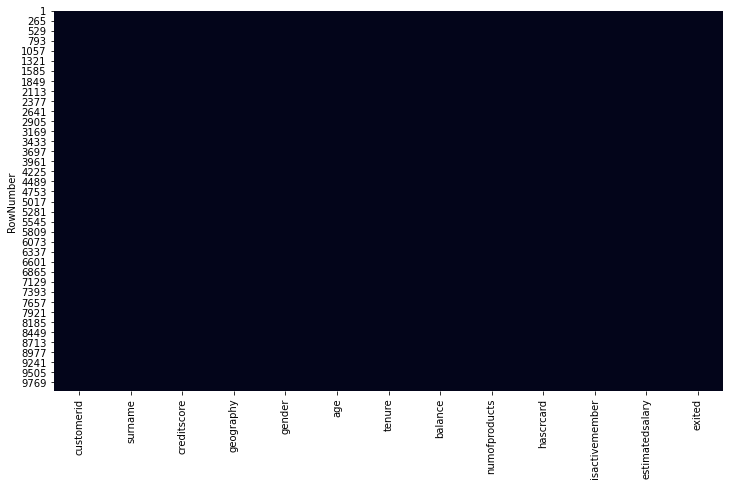

In [8]:
# The graph below with the dark shade implies there is no missing data
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cbar=False);

## 3.0 Exploratory Data Analysis<a id='eda'></a>
<p style="text-align:justify;">The goal for this project as mentioned earlier was to reduce customer churn by identifying potential churn candidates. Based on this stated goal, we will perform any set of analysis of our data to obtain insights that can help us arrive at some plausible conclusions.</p>

To achieve the first goal, the we will look at general distirbutions of our features and try to answer the questions listed below:

* What is the total percentage of customers that have churned?
- What is the average age of the churned out and retaining customers?
- What is the average balance of the churned out and retaining customers?
* What is the percentage of customers churned based,
    - Gender
    - Credit card status
    - Country
    - Membership status

<b>NB: Questions that can be answered are not limited to the ones stated above.</b>

### 3.1 Churn Count and Percentage <a id='ccp'></a>

C:\Users\AmaliTech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


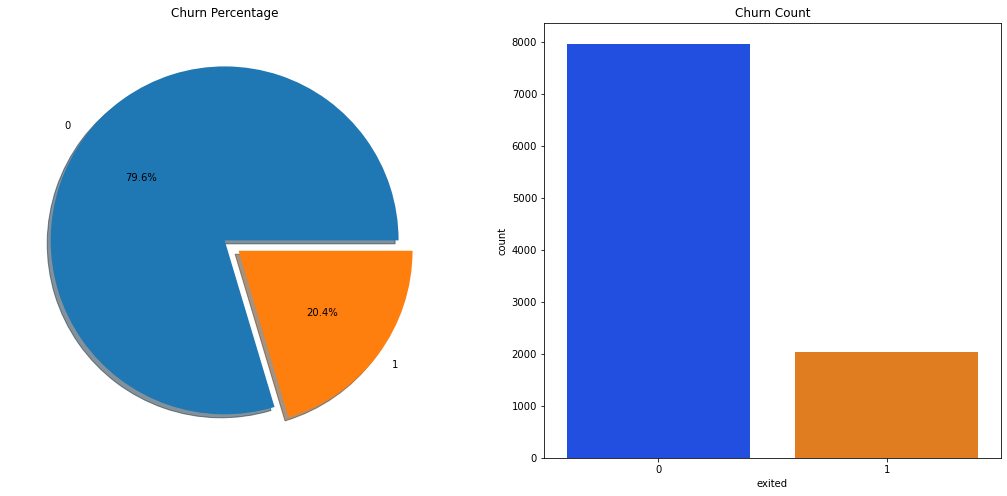

In [9]:

# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn Percentage')
ax[0].set_ylabel('')
sns.countplot(data['exited'],palette=sns.color_palette("bright", 2),ax=ax[1])
ax[1].set_title('Churn Count')
plt.show()


### 3.2 Mean Age of Churned and Retaining Customers <a id='ma'></a>
- The average of Churned customers is 45 years 
- The average of Retaining customers is 37 years

In [10]:
average_age=pd.DataFrame(data['age'].groupby(data['exited']).mean())
average_age

,age
exited,
0,37.408389
1,44.837997


### 3.3 Mean Balance of Churned and Retaining Customers <a id='mb'></a>
- The average Balance of the Churned customers is **\$91,108.54**
- The average Balance of the Churned customers is **\$72745.30**

In [11]:
average_balance=pd.DataFrame(data['balance'].groupby(data['exited']).mean())
average_balance

,balance
exited,
0,72745.296779
1,91108.539337


### 3.4 Churn counts based on, <a id='cc'></a>
- Gender
- Credit card
- Country
- Membreship Status

In [12]:
membership=pd.crosstab(data['exited'],data['isactivemember'])
membership

isactivemember,0,1
exited,,
0,3547,4416
1,1302,735


In [13]:
country=pd.crosstab(data.exited,data.geography)
country

geography,France,Germany,Spain
exited,,,
0,4204,1695,2064
1,810,814,413


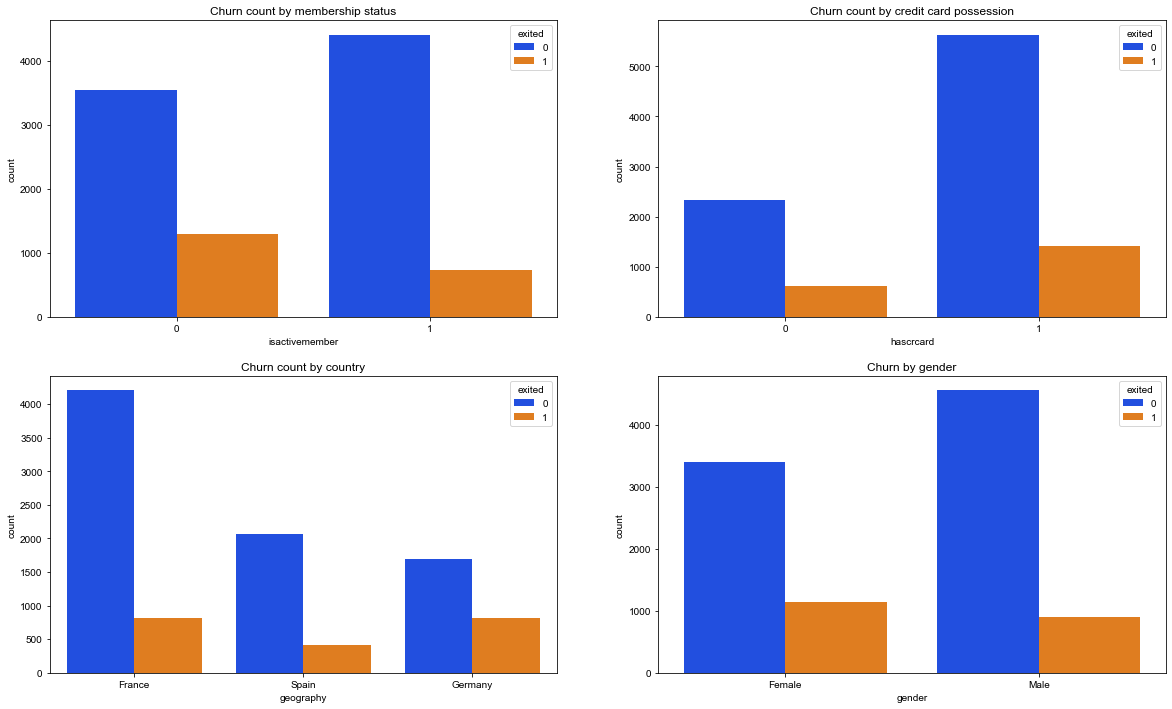

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography',data=data, hue='exited',palette=sns.color_palette("bright", 2),ax=ax[1][0]).set_title("Churn count by country")
sns.countplot(x='gender', data=data, hue='exited',palette=sns.color_palette("bright", 2),ax=ax[1][1]).set_title("Churn by gender")
sns.countplot(x='isactivemember', data=data,hue='exited',palette=sns.color_palette("bright", 4),ax=ax[0][0]).set_title("Churn count by membership status")
sns.countplot(x='hascrcard', data=data,hue='exited',palette=sns.color_palette("bright", 2),ax=ax[0][1]).set_title("Churn count by credit card possession")
sns.set(font_scale=1) 
plt.show()

### Findings from Boxplot
From the Boxplots below, some of the significant observations are,
- The median age of the churned customers is higher than the returning customers
- The median balance of the churned customers is higher than the returning customers

<AxesSubplot:xlabel='exited', ylabel='estimatedsalary'>

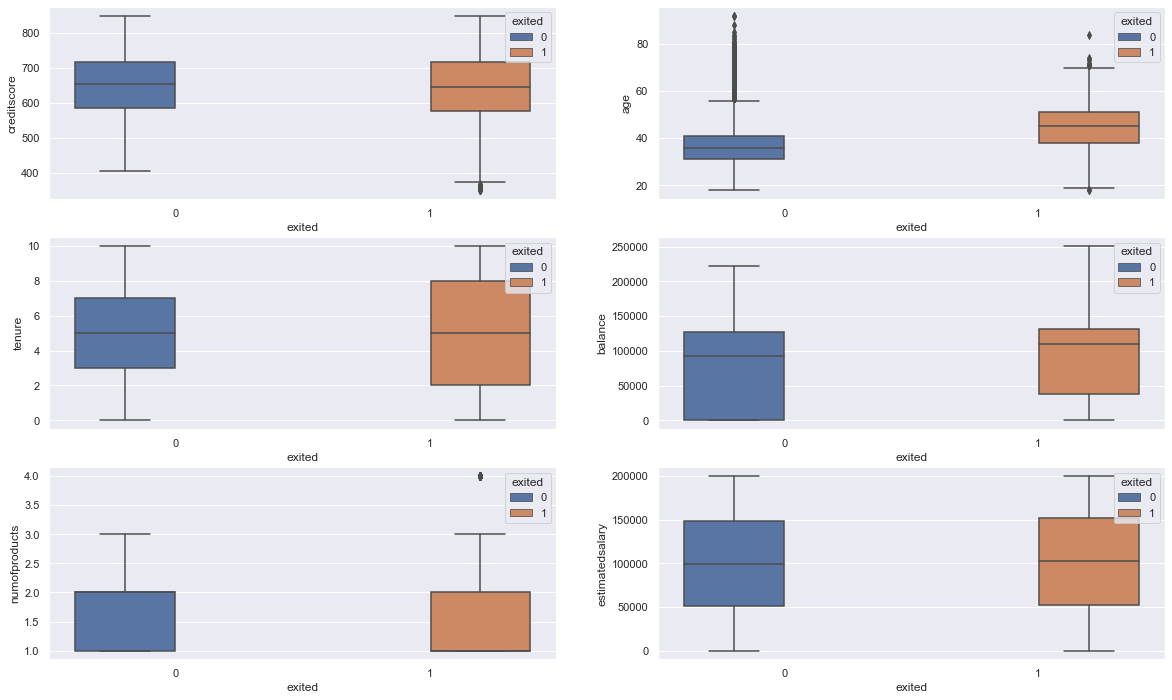

In [15]:
# Boxplots showing the distributionnof the data and outliers
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = data, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = data , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = data, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = data, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = data, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = data, ax=axarr[2][1])

### Churn Percentages based on
- Gender
- Credit card possesion
- Membership Status
- Country

### Findings
From the contingency tables below, 
- 25.07% of females churned out
- 16.46% of males chrned out
- 26.85% of  Active members chruned as against 14.26% of Non-Active members
- 32.44% of Germans, 16.67% of Spanish and 16.15% of the French churned out

In [16]:
# Percentage churn for male and female
gender=pd.crosstab(data['exited'],data['gender']).apply(lambda r:r/r.sum(),axis=0)*100
gender

gender,Female,Male
exited,,
0,74.928461,83.544072
1,25.071539,16.455928


In [17]:
# Percentage churn for credit card holders and non holders
credit_card=pd.crosstab(data['exited'],data['hascrcard']).apply(lambda r:r/r.sum(),axis=0)*100
credit_card

hascrcard,0,1
exited,,
0,79.185059,79.815734
1,20.814941,20.184266


In [18]:
# Percentage churn for active and non-active members
active_member=pd.crosstab(data['exited'],data['isactivemember']).apply(lambda r:r/r.sum(),axis=0)*100
active_member

isactivemember,0,1
exited,,
0,73.149103,85.730926
1,26.850897,14.269074


In [19]:
# Percentage churn for France, Gemany and Spain
country=pd.crosstab(data['exited'],data['geography']).apply(lambda r:r/r.sum(),axis=0)*100
country

geography,France,Germany,Spain
exited,,,
0,83.845233,67.556796,83.326605
1,16.154767,32.443204,16.673395


## 4.0 Inferential Statistics<a id=is></a>

* Check whether or not the difference in mean age of churned and retaining customers is **statistically significant**
<br>

* We want to check whether the difference in the churn proportion between the following groups is **Statistically Significant**
     - Male and Female 
     - France and Germany
     - Active and non-active members
     - Credit card and non-credit card holders  

 


 
### 4.1 Hypothesis Testing for Difference in Mean <a id='tdm'></a>
$H_0:$ There exists no difference in mean age of churned and retaining customers<br>
$H_1:$  There exist a difference in mean age of churned and retaining customers<br>

Significance level $\alpha = 0.05$

****
$$H_0: \bar{X}_1-\bar{X}_2=0$$

$$Two\;sided\; test\; H_1: \hat{X}_1-\hat{X}_2 \neq 0$$

$$One\;sided\; test\; \bar{X}_1-\bar{X}_2 >0$$<br>
$$One\;sided\; test\; \bar{X}_1-\hat{X}_2 <0$$


$$Test\; Statistics\; Z=\frac{(\bar{X}_1-\bar{X}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{{\sigma}_1^2}{n_1}+\frac{{\sigma}_2^2}{n_2}}}$$




Decision: **Reject** $H_0$ if $p<0.05$ else **Fail to reject** $H_0$<br>




### Decision
**Reject the Null Hopthesis**<br>

Based on the hypothesis test conducted we conclude that the difference in the mean ages of Churned and Retaining customers is **Statistically Significant**.<br> 

Hence and investigation could be conducted to find why the old churn out of the Bank. 

### Two sided test ($Two\;sided\; test\; H_1: \mu_1 - \mu_2 = 0$)

In [20]:
from statsmodels.stats.weightstats import ztest
churned_age=data[data['exited']==1].age
retaining_age=data[data['exited']==0].age
alpha=0.05
mu=0
ztest_Score, p_value= ztest(churned_age,retaining_age,value = mu, alternative='two-sided')

if(p_value <  alpha):
  print("P value: =",p_value,"\nReject Null Hypothesis")
else:
  print("P value: =",p_value,"\nFail to Reject NUll Hypothesis")

P value: = 1.0508082506224645e-194 
Reject Null Hypothesis


### One sided test ($One\;sided\; test\; H_1: \mu_1 - \mu_2 > 0$)

In [21]:
ztest_Score, p_value= ztest(churned_age,retaining_age,value = mu, alternative='larger')

if(p_value <  alpha):
  print("P value: =",p_value,"\nReject Null Hypothesis")
else:
  print("P value: =",p_value,"\nFail to Reject NUll Hypothesis")

P value: = 5.2540412531123224e-195 
Reject Null Hypothesis


### One sided test ($One\;sided\; test\; H_1: \mu_1 - \mu_2 < 0$)

In [22]:
ztest_Score, p_value= ztest(churned_age,retaining_age,value = mu, alternative='smaller')

if(p_value <  alpha):
  print("P value: =",p_value,"\nReject Null Hypothesis")
else:
  print("P value: =",p_value,"\nFail to Reject NUll Hypothesis")

P value: = 1.0 
Fail to Reject NUll Hypothesis



 
### 4.2 Hypothesis Testing for Difference in Proportion <a id='tdp'></a>
$H_0:$ There exists no difference in churned male proportion and churned female proportion<br>
$H_1:$  There exist a difference in churned male proportion and churned female proportion<br>

Significance level $\alpha = 0.05$

****
$$H_0: \hat{p}_1-\hat{p}_2 = 0$$

$$Two\;sided\; test\; H_1: \hat{p}_1-\hat{p}_2 \neq 0$$

$$One\;sided\; test\; \hat{p}_1-\hat{p}_2 >0$$<br>
$$One\;sided\; test\; \hat{p}_1-\hat{p}_2 <0$$
 

$$Test\; Statistics\; Z=\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\frac{p_1q_1}{n_1}+\frac{p_2q_2}{n_2}}}$$


$$where\; q_1=1-p_1$$
$$q_2=1-p_2$$


Decision: **Reject** $H_0$ if $p<0.05$ else **Fail to reject** $H_0$<br>


$ p_1\implies$ the proportion of churned male <br>
$ p_2\implies$ the proportion of churned female 

### Decision
**Reject the Null Hopthesis**<br>
Based on the hypothesis test conducted we conclude that the difference in the churned proportion of Male and Female is **Statistically Significant**.<br> 
Hence and investigation could be conducted to find why more Male customers are churning out. 

In [23]:
gender1=pd.crosstab(data['exited'],data['gender'])#.apply(lambda r:r/r.sum(),axis=0)*100
gender1

gender,Female,Male
exited,,
0,3404,4559
1,1139,898


### Two sided  test ($H_1: \hat{p}_1-\hat{p}_2 \neq 0$)

In [24]:
male_churn=gender1.Male[1]
female_churn=gender1.Female[1]
male_sample=gender1.Male.sum()
female_sample=gender1.Female.sum()
alpha = 0.05

zstat, p_value = proportions_ztest(count=np.array([male_churn,female_churn]), 
                                   nobs=np.array([male_sample,female_sample]), value=0,prop_var=False,alternative='two-sided')

if(p_value <  alpha):
  print("Z_stat: =",zstat,"\nP value: =",p_value,"\nDecision: Reject Null Hypothesis")
else:
  print("Z_stat: =",zstat,"\nP value: =",p_value,"\nDecision: Fail to Reject NUll Hypothesis")


Z_stat: = -10.651248767347461 
P value: = 1.720414987484119e-26 
Decision: Reject Null Hypothesis


### One sided  test ($H_1: \hat{p}_1-\hat{p}_2 < 0$)

In [25]:
zstat, p_value = proportions_ztest(count=np.array([male_churn,female_churn]), 
                                   nobs=np.array([male_sample,female_sample]), value=0,prop_var=False,alternative='smaller')

if(p_value <  alpha):
  print("Z_stat: =",zstat,"\nP value: =",p_value,"\nDecision: Reject Null Hypothesis")
else:
  print("Z_stat: =",zstat,"\nP value: =",p_value,"\nDecision: Fail to Reject NUll Hypothesis")

Z_stat: = -10.651248767347461 
P value: = 8.602074937420595e-27 
Decision: Reject Null Hypothesis


### One sided  test ($H_1: \hat{p}_1-\hat{p}_2 > 0$)

In [26]:
zstat, p_value = proportions_ztest(count=np.array([male_churn,female_churn]), 
                                   nobs=np.array([male_sample,female_sample]), value=0,prop_var=False,alternative='larger')

if(p_value <  alpha):
  print("Z_stat: =",zstat,"\nP value: =",p_value,"\nDecision: Reject Null Hypothesis")
else:
  print("Z_stat: =",zstat,"\nP value: =",p_value,"\nDecision: Fail to Reject NUll Hypothesis")

Z_stat: = -10.651248767347461 
P value: = 1.0 
Decision: Fail to Reject NUll Hypothesis


In [27]:
# # Correlation Matrix
# f, ax = plt.subplots(figsize= [20,15])
# sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
# ax.set_title("Correlation Matrix", fontsize=20)
# plt.show()

## 5.0 Feature Engineering<a id='fg'></a>
- The Age of the customers was grouped in 5 bins
- The Credit Score was grouped into 10 bins
- New features were created

In [28]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
data["NewAge"] = pd.qcut(data['age'], 5)
pd.crosstab(data['exited'],data['NewAge']).apply(lambda r:r/r.sum(),axis=0)*100
#data.groupby("NewAge")["exited"].value_counts()

NewAge,"(17.999, 31.0]","(31.0, 35.0]","(35.0, 40.0]","(40.0, 46.0]","(46.0, 92.0]"
exited,,,,,
0,92.369309,90.679394,85.039718,71.403302,54.058355
1,7.630691,9.320606,14.960282,28.596698,45.941645


### 5.1 Creation of new features <a id='cnf'></a>

In [29]:
data["NewAGT"] = data["age"] - data["tenure"]
data["CreditsScore"] = pd.qcut(data['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data["AgeScore"] = pd.qcut(data['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
data["BalanceScore"] = pd.qcut(data['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data["EstSalaryScore"] = pd.qcut(data['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data["NewEstimatedSalary"] = data["estimatedsalary"] / 12 

In [30]:
data.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667


## 6.0 Modelliing <a id='md'></a>


In [31]:
# Libraries for modelling
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'


### 6.1 One Hot Encoding <a id='ohe'></a>

In [32]:
data = pd.get_dummies(data, columns =["geography", "gender"], drop_first = True)

In [33]:
data.head()

,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333,0,1,0
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667,0,1,0


In [34]:
data = data.drop(["customerid","surname","NewAge"], axis = 1)

In [35]:
data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,0,1,0


###  6.2 Scaling and Transforming the data<a id='st'></a>

In [36]:
cat_data = data[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [37]:
cat_data.head()

,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,
1,0,0,0,1,1
2,0,1,0,0,1
3,0,0,0,1,0
4,0,0,0,0,0
5,0,1,0,1,1


In [38]:
y = data["exited"]
X = data.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [39]:
X.head()    

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,101348.88,40,4,6,1,6,8445.740000
2,608,41,1,83807.86,1,112542.58,40,4,6,5,6,9378.548333
3,502,42,8,159660.80,3,113931.57,34,1,6,10,6,9494.297500
4,699,39,1,0.00,2,93826.63,38,7,5,1,5,7818.885833
5,850,43,2,125510.82,1,79084.10,41,10,6,8,4,6590.341667


In [40]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [41]:
X = pd.concat([X,cat_data], axis = 1)

In [42]:
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.666667,-0.2,0.50,-0.9,0.1,0.011739,0,0,0,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.666667,-0.2,0.50,-0.1,0.1,0.125512,0,1,0,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.166667,-0.8,0.50,0.9,0.1,0.139630,0,0,0,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.500000,0.4,0.25,-0.9,-0.1,-0.064717,0,0,0,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.750000,1.0,0.50,0.5,-0.3,-0.214561,0,1,0,1,1


In [43]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: exited, dtype: int64

In [44]:
print(X.shape, y.shape)

(10000, 17) (10000,)


### 6.3 Splitting Data in Train and Test sets & Balancing under represented labels<a id='tts'></a>

In [45]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)


In [46]:
# Because it's an unstable data set, we're going to increase the number of samples.
# References: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12692, 17) (3120, 17) (12692,) (3120,)


### 6.4 Models <a id='mds'></a>

In [48]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

### 6.5 Models' Evaluation <a id='mo_ev'></a>

In [49]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.737500)
KNN: (0.731410)
CART: (0.799359)
RF: (0.847436)
SVM: (0.800321)
XGB: (0.884936)
LightGBM: (0.901923)
CatBoost: (0.907051)


### 6.6 Variable Importance Levels of All Models <a id='var_imp'></a>

In [50]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

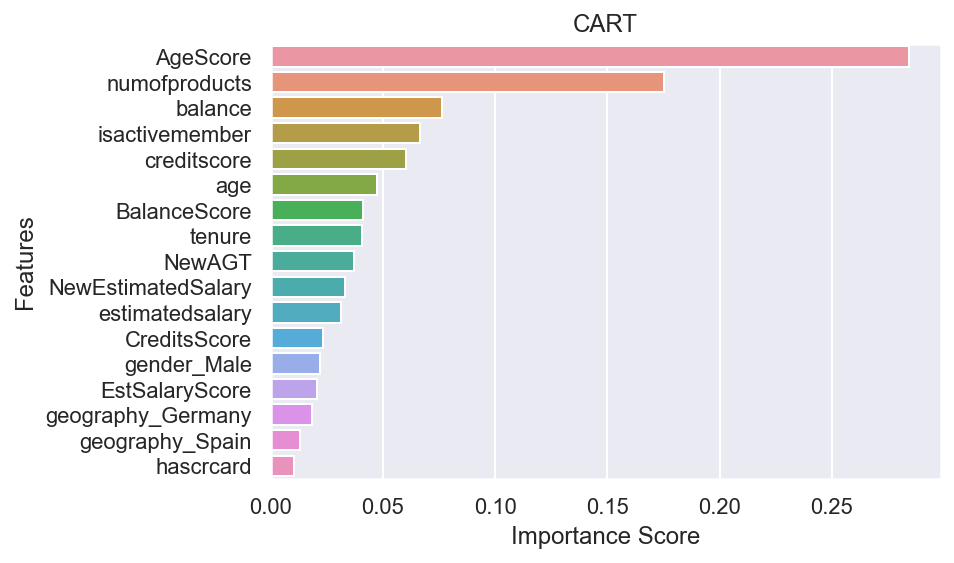

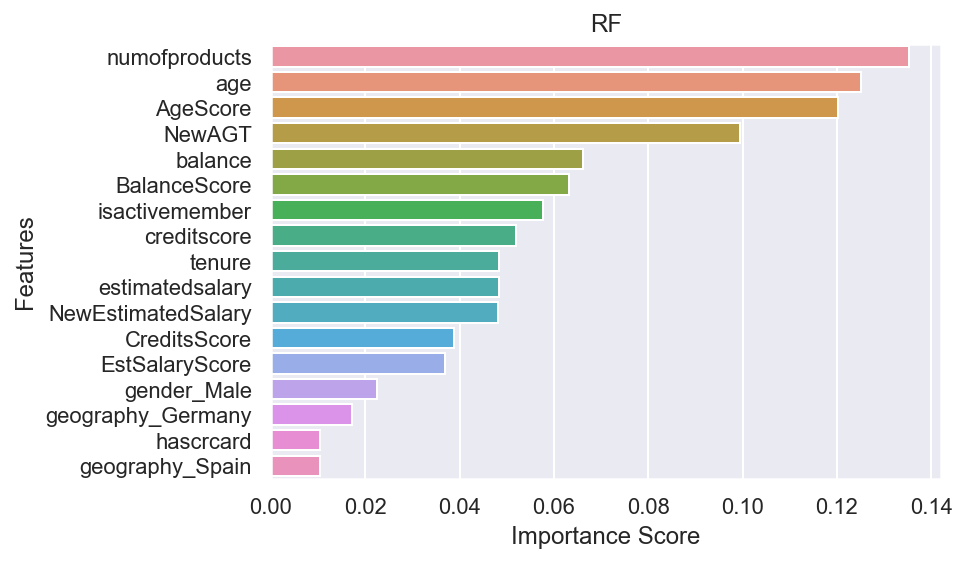

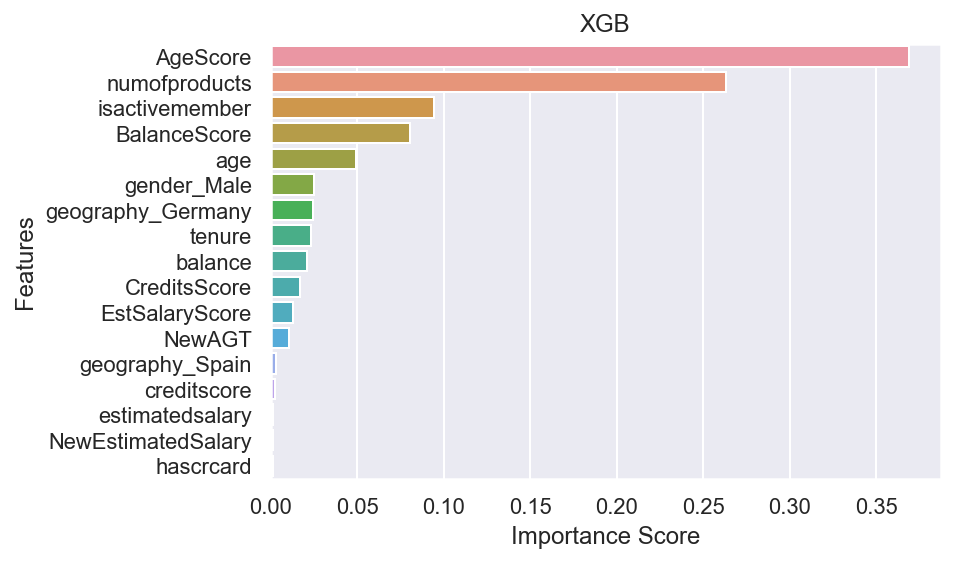

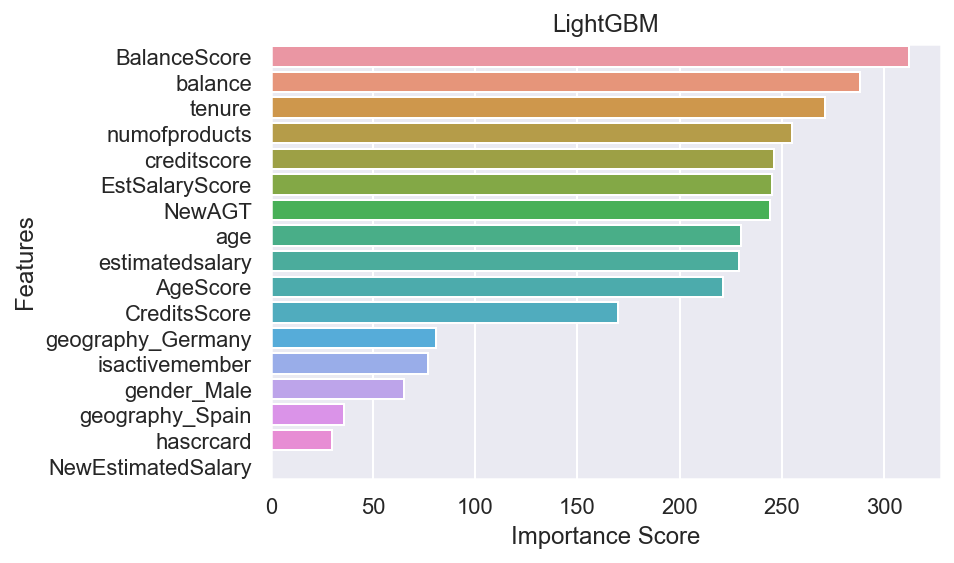

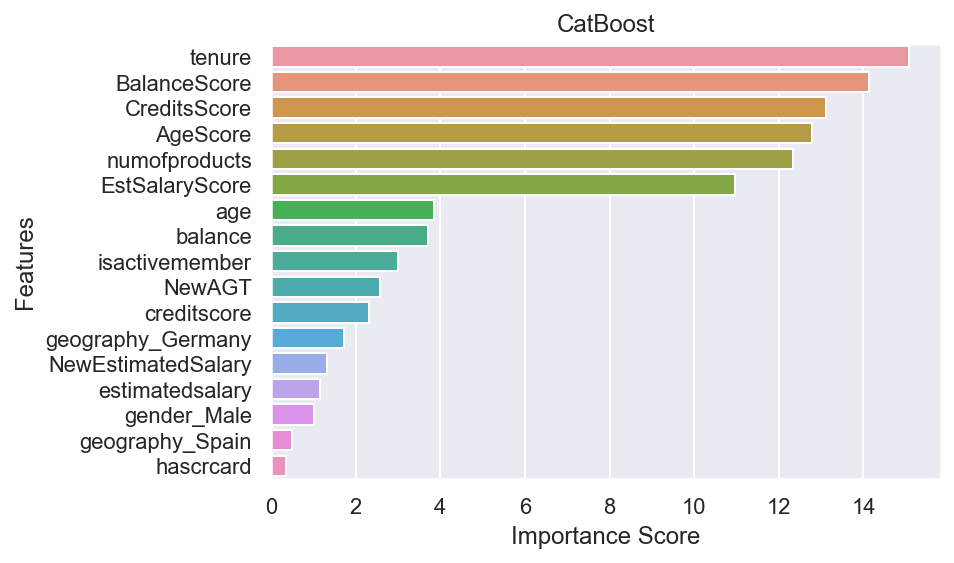

In [51]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

### 6.7 Model Tuning <a id='mod_tune'></a>

In [52]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.906090)
LightGBM: (0.909615)
CatBoost: (0.892308)


### Model Tuning Variable Importance Level

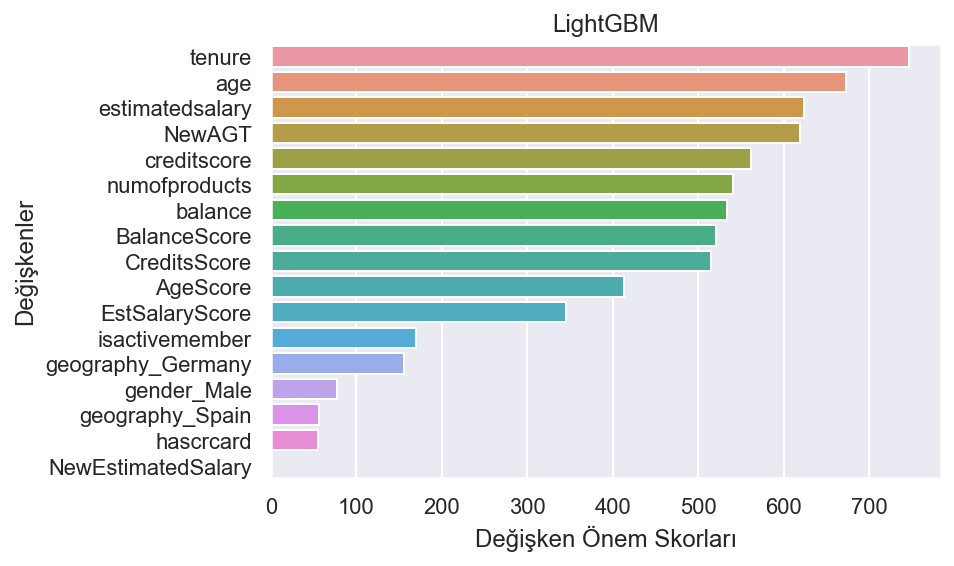

In [53]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

### 6.8 Confusion Matrix <a id='conf_mat'></a>

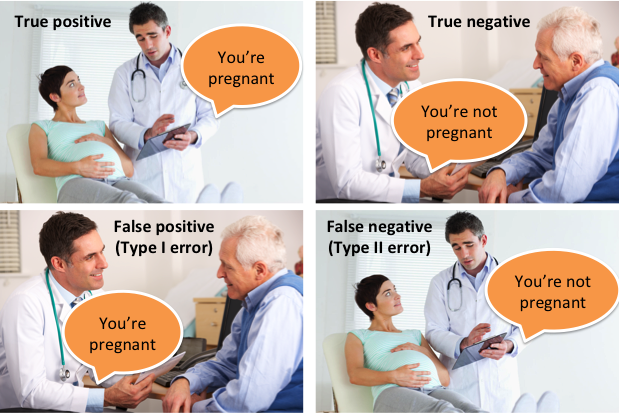

In [54]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [55]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

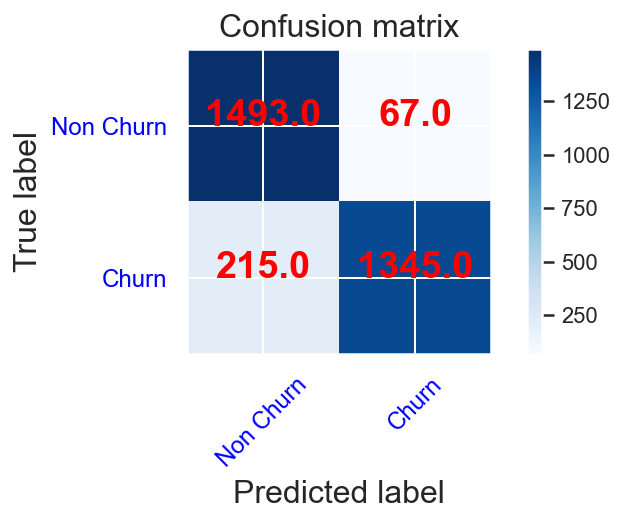

In [56]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [57]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1493
False Positives:  67
False Negatives:  215
True Positives:  1345


In [58]:
data_pred = pd.DataFrame(data=[],columns=["y_test"])
data_pred["y_pred"] = y_pred
data_pred["y_test"] = y_test
data_pred.index = data_pred.index + 1
data_pred.head()

,y_test,y_pred
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0


In [59]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in data_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)    

In [60]:
data_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
data_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
data_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
data_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
data_pred.head()

,y_test,y_pred,prediction_result
1,0,1,FP
2,0,0,TN
3,0,0,TN
4,0,0,TN
5,0,0,TN


In [61]:
data_pred[data_pred["prediction_result"] == "FP"].head()

,y_test,y_pred,prediction_result
1,0,1,FP
29,0,1,FP
69,0,1,FP
80,0,1,FP
105,0,1,FP


In [62]:
data_pred[data_pred["prediction_result"] == "FN"].head()

,y_test,y_pred,prediction_result
8,1,0,FN
12,1,0,FN
20,1,0,FN
30,1,0,FN
34,1,0,FN


### 6.9 ROC Curve <a id='ROC'></a>

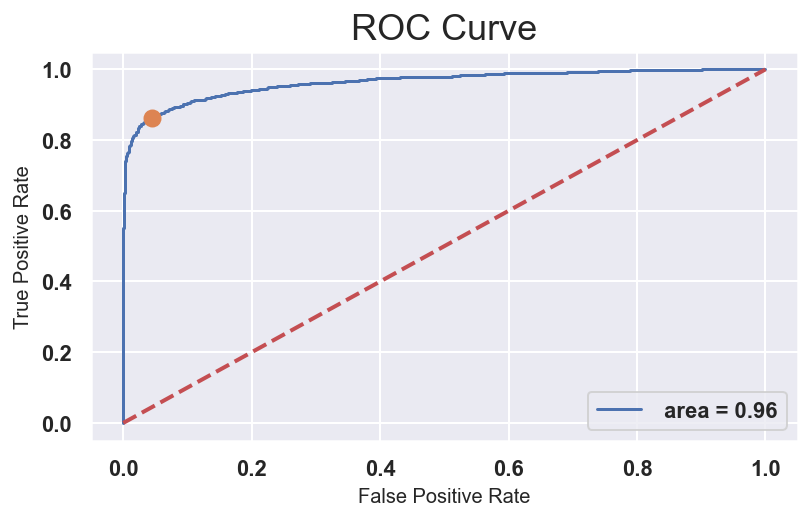

In [63]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# 7.0 Conclusion <a id='cl'></a>
The aim of this study was to create classification models for the churn dataset and to predict whether a person churns out by creating predictive models and to obtain maximum accuracy score in the established models. 

- The inferential statistics showed the there existed a **Statistically Significant** diffrence between the churned proportions of 
    - Male and Female
    - France and Germany   
    - The difference in the mean age of churned and retaining customers is **Statistically Significant**

- During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost are some ML implemented and evaluated to obtain initial Accuracy  Score.
- Hyper parameter tuning was conducted on the XGBoost, LightGBM, CatBoost to optimize the algorithms and increase the Accuracy Score.

- Result; The model created as a result of LightGBM hyperparameter optimization became the model with the maxium Accuracy Score. **(0.9116)**
- Further investigation could be conducted to discover the reasons behind the old churning

# 8.0 References <a id='ref'></a>
* Jason Brownlee, Statistical Methods for Machine Learning: Discover how to Transform Data into Knowledge with Python,2019.
* Jason Brownlee, Master Machine Learning Algorithms: Dicover how they work and Implement them from scratch, 2017
* Jason Brownlee, Machine Learning with Python: Understand your data, create accurate models and work projects end-to-end, 2016.
* https://seaborn.pydata.org/ 
* https://scikit-learn.org/stable/
* 
